## Plotting with categorical data

관계형plot 튜토리얼에서 우리는 한 데이터셋의 여러 variables간 관계를 보여주기 위하여 여러 데이터시각화 방법을 사용했다. 이 예제에서는 이 예제에서는 2개의 숫자형 데이터간의 관계를 나타내는 방법에 대해서 집중하여 알아볼 예정이다. 만일 데이터셋의 변수 중 하나가 categorical(데이터를 이산적으로 나눌 수 있는)경우에는 보다 특별한 방법을 사용하여 데이터시각화를 해야할 것이다. 

seaborn에는 categorical data를 포함한 관계를 시각화하기위한 여러가지 방법이 존재한다. relplot(scatterplot, lineplot)과 같이 2가지 방법이 있다. 그리고 수많은 categorical data를 다른 방법으로 그리고 figure-level interface에서 표현하기 위해서 axes-level 함수들이존재한다. 

categorical plot 종류를 3개라고 생각하고 접근하는 것이 이해에 좋다

###### Categorical Scatterplot

stripplot catplot(kind='strip') 이게 디폴트 값이다.
swarmplot catplot(kind='swarm')

###### Categorical distribution plots

boxplot : catplot(kind='box')
violinplot : catplot(kind='violin')
boxenplot : catplot(kind='boxen')

###### Categorical estimate plots

pointplot : catplot(kind='point')
barplot : catplot(kind='bar')
countplot : catplot(kind='countplot')

이 분류는 데이터 granularity(세분화)정도에 따라서 구분지어준다. 위 3개의 분류 중 어떤 것을 사용할 지를 알았을 때 반드시 이 데이터로 어떤 물음을 답할 것인지에 대해서 생각해보아야 한다. 톨일된 api는 각기 다른 종류의 차트로의 O변환을 쉽게만들 것이고 데이터를 다각도에서 볼 수 있도록해줄 것이다.

이 튜토리얼에서는 figure-level inrerface인 catplot()에 대해서 자세하게 다룰 예정이다. 항상 이 함수 (catplot)은 고수준의 인터페이스임을 생각하자.
 Remember that this function is a higher-level interface each of the functions above, so we’ll reference them when we show each kind of plot, keeping the more verbose kind-specific API documentation at hand.

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='ticks', color_codes=True)

### Categorical scatterplots

catplot에 있는 데이터의 기본적인 표현은 산점도를 이용하는 것이다. seaborn에는 2개의 categorical scatter plot이 있다. 그 plot들은 각기 다른 방법으로 데이터를 표현하는 방법에 대한 주요문제를 해결해나간다. 그것은 한 카테고리에 속하는 모든 점들을 같은 categorical variable에 상승하는 축을 따라서, 포지션 위에 떨어뜨리는 것이다. stripplot()은 categorical 축위에 있는 점들의 위치를 "random jitter"값 만큼 조정하는 것이다. 예제를 살펴보자

In [6]:
tips = sns.load_dataset('tips')
# sns.catplot(=)

In [7]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


##### stripplot

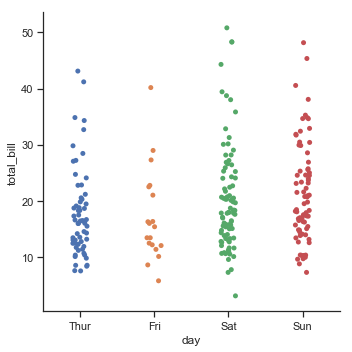

In [8]:
sns.catplot(x='day', y='total_bill', data=tips)

jitter 파라미터는 jitter의 정도 혹은 이를 비활설화시킬수도있다.

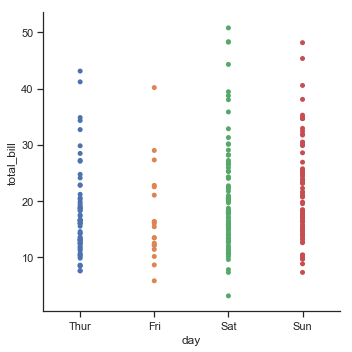

In [9]:
sns.catplot(kind='strip', x='day', y='total_bill', jitter=False, data=tips)

2번째 방식은 categorical axe인 day를 기준으로 각 점들이 겹쳐지지않도록 점들의 위치를 조정하는 것이다. 이 방법은 이 관측치들을 더 잘 표현할 수 있게 해준다. 비록 이 방법은 DATASET이 상대적으로 작을 때 사용할 수 있다. 이런 종류의 plot을 beeswarm이라고 무르며 이는 swarmplot 메소드를 이용하여 그릴 수 있다. catplot으로는 kind='swarm'을 해주면 된다.

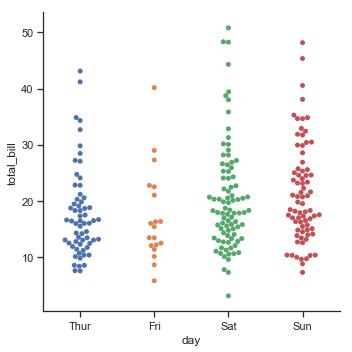

In [10]:
sns.catplot(kind='swarm', x='day', y='total_bill', data=tips)

관계형 plot과 비슷하게 이 산점도 또한 semantic들을 사용하여 다른 변수를 추가시킬 수 있다. (hue : 색깔 , style : 라인의 모양, size : 모양의 크기 하지만, catplot은 오롯이 hue만을 지원함.) hue semantic을 이용하여 각기 다른 categorical data들을 표현해낼 수 있다.

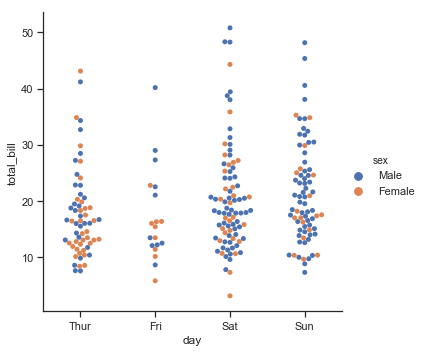

In [11]:
sns.catplot(kind='swarm', x='day', y='total_bill', hue='sex', data=tips)

숫자형 데이터와 다르게 categorical variable의 level을 정하는 것에 대해서 항상 명백하게 보장할수가 없다. 일반적으로 seaborn categorical plotting 메소드는 데이터로부터 categories의 순서를 추론하려고 한다. 만일 데이터가 판다스의 Categorical datatype을 가진 column이 있다면 디폴트 순서는 그 컬럼에서부터 일 것이다.만일 변수를 숫자형 categorical axis로 pass하는 경우에는 그 순서는 크기에 따라서 소팅될 것이다.

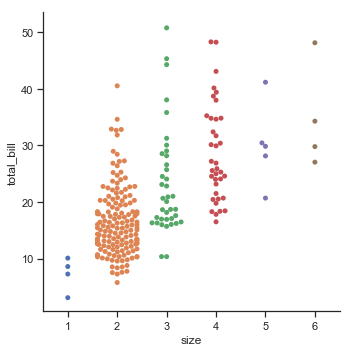

In [13]:
sns.catplot(kind='swarm', x='size', y='total_bill', data=tips)

순서를 정하는 또 다른 option은 데이터셋안에 그들이 나타난 정도에 따라서 순서가 정해지는 것이다. 그리고 또한 ordering은 order parameter에 따라서 명시적으로 정해질 수도 있다.

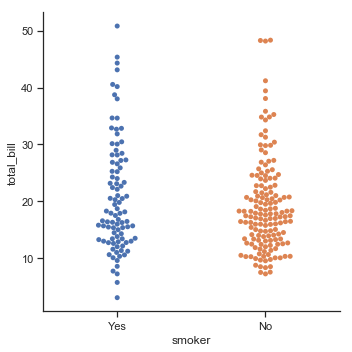

In [16]:
sns.catplot(kind='swarm', x='smoker', y='total_bill', data=tips, order=["Yes", "No"])

이 예시에서 categorical axe에 대한 개념을 정리했다.항상 이 categorical axe는 horizontal axis(수평 x 축)에만 표현을 했는데 y축 vertical axis에다가 표현을 해도 유의미한 분석을 할 수 있다.

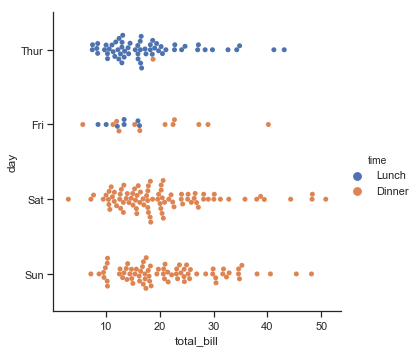

In [18]:
sns.catplot(kind='swarm', x='total_bill', y='day', hue='time', data=tips)

## 관측치의 분포(카테고리 내)

데이터셋의 사이즈가 증가함에 따라서, categorical sactter plots이 각 카테고리안에 있는 값들의 분포정보를 제공하는 것에 대해서 제한적이었다. 이런 경우에 distribution을 요약하는 많은 방법들이 있다. 이 방법들로인하여 많은 데이터사이즈의 데이터셋의 카테고리별 분포에 대해서 차이점을 설명하는 것이 매우쉬워졌다.

## Box plot

quartile이란 어떤 한 distribution을 4개등분하고 그 4개 등분한 것에 

첫번째는 boxplot이다. 이 plot은 outlier value을 분포의 3개 quartile value를 보여준다. "whisker"라는 것은 중앙에서 중간기준으로 하여 높은 Quartile, 낮은 quartile의 1.5QRs 이내까지 이르는 부분까지 이어진다. 그리고 그 관측치(whisker)에서 떨어진 값들은 독립적으로 표현된다. 이는 boxplot의 각 값들이 실제 관측치에 상응된다는 것을 의미한다. 

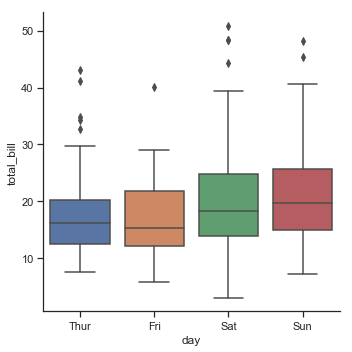

In [19]:
sns.catplot(x="day", y="total_bill", kind="box", data=tips);

hue semantic을 추가하여 semantic 변수의 각 값 + 기존의 categorical axis에 따라서 분리되어 겹쳐지지 않게된다.

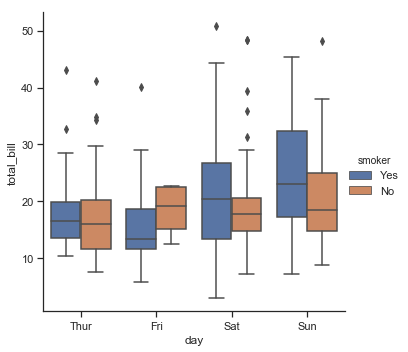

In [20]:
sns.catplot(x='day', y='total_bill', hue='smoker', kind='box', data=tips)

이렇게 hue semantic으로 기존 boxplot의 카테고리이외로 추가로 분류하는 것 dodging이라고 한다. 이 dodging은 디폴트로 수행되는데 그 이유는 이 semantic variable이 main categorical variable안에 중첩되어있기 때문이다. 이런 케이스가 아닌경우에 dodging을 끌 수 있다.

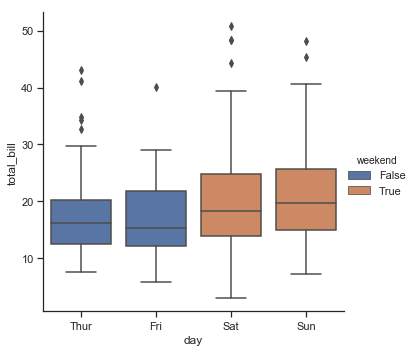

In [24]:
tips["weekend"] = tips["day"].isin(["Sat", "Sun"])
sns.catplot(kind='box', x='day', y='total_bill', hue='weekend', dodge=False, data=tips)

연관된 메소드로 boxenplot이 있는데 이 메소드는 boxplot와 아주 유사하지만 distribution의 shape를 보다 직관적으로 볼 수 있도록 최적화된 plot종류이다. 매우 큰 데이터를 설명할때 아주 좋다.

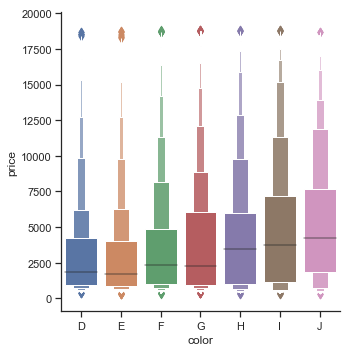

In [25]:
diamond = sns.load_dataset("diamonds")
sns.catplot(kind='boxen', x='color', y='price', data=diamond.sort_values("color"))

### Violineplots

다른 접근법으로는 violinplot이 있다. 이 plot은 boxplot을 kernel density estimation procedure과 결합시킨다. 

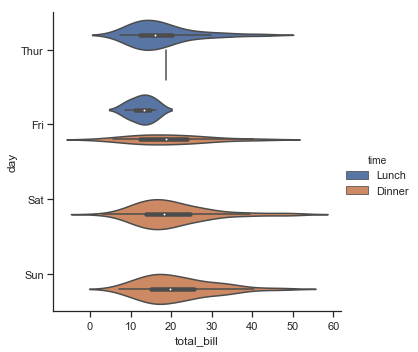

In [30]:
sns.catplot(kind='violin', data=tips, x='total_bill', y='day', hue='time')

violin plot은 kernel density의 측정치를 이용하여 값들의 분포에 대한 설명을 더 풍부하게 해준다. 추가적으로 box plot의 quartile과 whisker값들은 violin안에 분포로 보이게된다. 분포의 아래쪽은 violin plot이 KDE를 사용하기 때문에 이 분포를 꼬거나(tweaking)하여 좀더 커스터마이징을 할수있다.

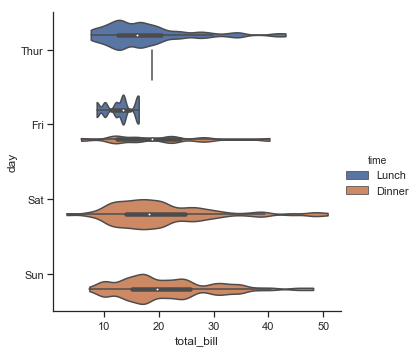

In [31]:
sns.catplot(x='total_bill', y='day', hue='time', kind='violin', bw=.15, cut=0, data=tips)

또한 violin plot의 분포 위 아래를 hue semantic variable을 이용하여 나눌 수 있다.(split=True조건) 단, 반드시 2개값만 가지는 semantic variable이어야 한다.

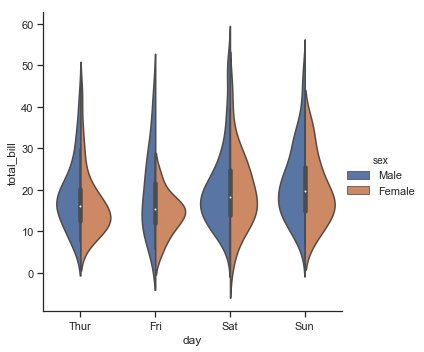

In [35]:
sns.catplot(x='day', y='total_bill', hue='sex', split=True, data=tips, kind='violin')

violin plot의 distribution을 꾸미는데 몇가지 option들이 있다. box plot 값들의 summary를 보여주는 대신에 개별 관측치를 보여주는 것이 그 방법이다.

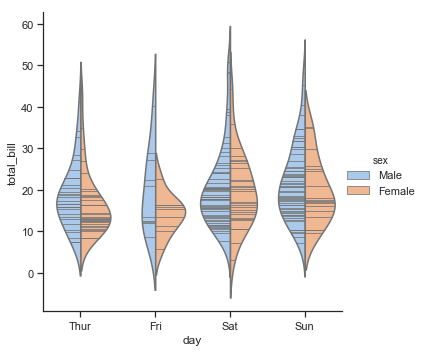

In [36]:
sns.catplot(kind='violin', x='day', y='total_bill', hue='sex', split=True, inner='stick', palette='pastel', data=tips)

swarmplot 혹은 stripplot을 box plot 혹은 violin plot과 합치는 것도 유의미한 결과를 가져오 것이다. 

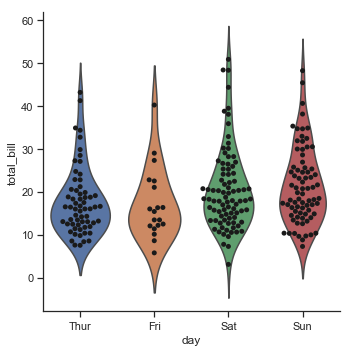

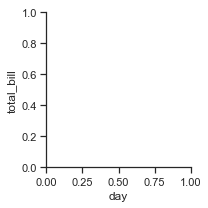

In [39]:
g = sns.catplot(x='day', y='total_bill', kind='violin', inner=None, data=tips)
sns.catplot(kind='swarm', x='day', y='total_bill', color='k', size=3, data=tips, ax=g.ax)

## Statistical estimation within categories

각 카테고리의 분포를 보여주는 것 이외에 중앙집중도(central tendancy)를 파악해야하는 경우가 있을지 모른다. seaborn은 이 목적을 위하여 2개의 방법론이 존재한다. 이 메소드의 BASIC API는 위에서 언급했던  catplot으로 동일하다

### Bar Plot

각 카테고리의 분포보다는 central tendancy를 파악하기 위해서 BAR PLOT을 사용한다 . SEABORN에서는 barplot이라는 메소드는 전체 데이터셋에서 작용하고 이 메소드를 추정치를 얻기위해서 적용한다. 각 카테고리내 수 많은 관측치들이 존재할 때, 부트스트래핑을 이용하여 신뢰구간을 구하고 이를 통하여 error bar 및 interval around를 구해준다

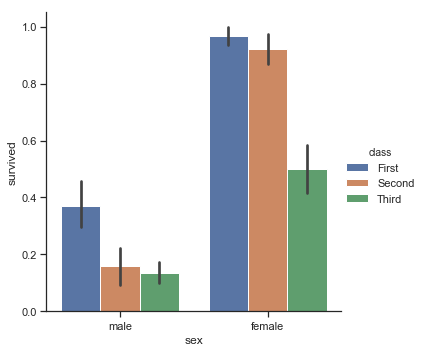

In [40]:
titanic = sns.load_dataset('titanic')
sns.catplot(x='sex', y='survived', hue='class', kind='bar', data=titanic)

이 bar plot를 사용하는 때는 두번째 variable에 대한 통계적인 계산을 하지않고 각 category의 관측치의 개수를 보여주고 싶을 때 사용한다.  이는 histogram과 매우 비슷한 케이스이다. seaborn에서는 countplot이라는 메소드로 이를 쉽게 수행할 수 있다.

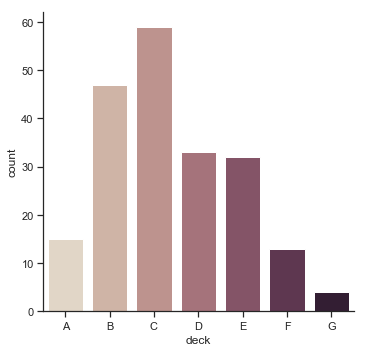

In [43]:
sns.catplot(kind='count', x='deck', data=titanic, palette="ch:.25")

bar plot과 count plot은 위에서 언급했던 모든 옵션들을 사용할 수 있다.

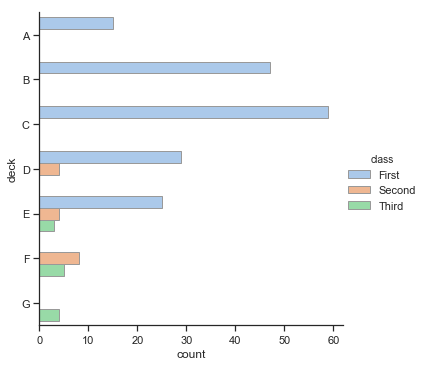

In [44]:
sns.catplot(y='deck', hue='class', kind='count', palette='pastel', edgecolor='.6', data=titanic)

### Point Plot

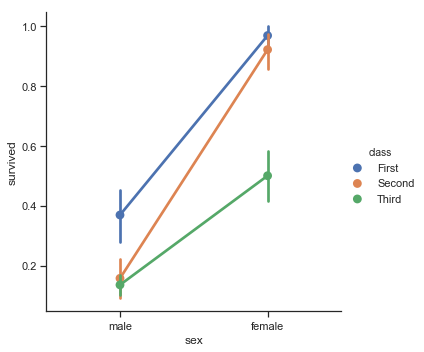

In [45]:
sns.catplot(x='sex', y='survived', kind='point', hue='class', data=titanic)

categorical function은 relative fuunction과 다르게 style이 존재하지 않기에 marker와 linestyle을 hue semantic varaiable에 따라 다르게하는 것은 좋은 아이디어이다. 

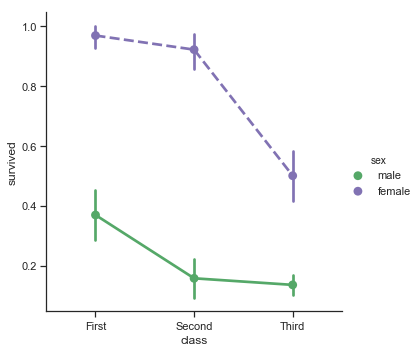

In [48]:
sns.catplot(kind='point', x='class', y='survived', 
            hue='sex', data=titanic, palette={'male' : 'g', 'female': 'm'}, 
            marker=['^', 'o'], linestyles=['-', '--'])